In [1]:
from importlib import reload
import datetime

import to_lexicon as lex
reload(lex)

import base_words
reload(base_words)
from base_words import *

import pickle
from collections import defaultdict

import numpy as np

In [2]:
path = "./NYT-OPINION2016-2017-processed"

start = datetime.datetime(2016, 6, 1)
end = datetime.datetime(2017, 7, 1)

articles = lex.get_articles_from_filepath(path, start, end)

print ("finished grabbing articles")

print (len(articles))

finished grabbing articles
5971


In [ ]:
left_collocations_article, l_arts = lex.get_collocations(articles, LEFT_WORDS, RIGHT_WORDS)
right_collocations_article, r_arts = lex.get_collocations(articles, RIGHT_WORDS, LEFT_WORDS)

In [32]:
# ------- ! DUMP ! ------- #
# with open('left_collocations_article.pkl', 'wb') as fp:
#     pickle.dump(left_collocations_article, fp)
# with open('right_collocations_article.pkl', 'wb') as fp:
#     pickle.dump(right_collocations_article, fp)
    
print (len(left_collocations_article))

2034


In [3]:
# ------- ! LOAD ! ------- #
with open ('left_collocations_article.pkl', 'rb') as fp:
    left_collocations_article = pickle.load(fp)
with open ('right_collocations_article.pkl', 'rb') as fp:
    right_collocations_article = pickle.load(fp)
    
print (len(left_collocations_article))

2034


In [4]:
print (left_collocations_article[1])

['honor', 'rise', 'week', 'defens', 'see', 'poll', 'score', 'low', 'trustworthi', 'question', 'well', 'let', 'talk', 'truth', 'polit', 'politician', 'man', 'isi', 'face', 'earth', 'answer', 'isi', 'embed', 'urban', 'area', 'iraqi', 'syrian', 'civilian', 'terrorist', 'kill', 'civilian', 'sent', 'airborn', 'mosul', 'wipe', 'isi', 'horrif', 'fight', 'morn', 'battl', 'mosul', 'agreement', 'sunni', 'tribe', 'let', 'main', 'stori', 'promis', 'break', 'big', 'bank', 'legal', 'author', 'econom', 'fallout', 'rais', 'stagnant', 'incom', 'american', 'mumbl', 'question', 'tax', 'polici', 'center', 'said', 'studi', 'full', 'econom', 'plan', 'includ', 'free', 'health', 'even', 'elimin', 'defens', 'budget', 'come', 'close', 'balanc', 'book', 'colleg', 'student', 'feel', 'bern', 'hope', 'wear', 'sunscreen', 'win', 'kid', 'pay', 'cash', 'burn', 'etern', 'lie', 'polit', 'creat', 'equal', 'think', 'ideolog', 'sell']


In [15]:
for art in l_arts[:500]:
    print (art.title)

NameError: name 'l_arts' is not defined

In [16]:
# with open ('left_collocations.pkl', 'rb') as fp:
#     left_collocations = pickle.load(fp)
# with open ('right_collocations.pkl', 'rb') as fp:
#     right_collocations = pickle.load(fp)
    
# print (len(right_collocations))

In [5]:
left_collocations = [col for art in left_collocations_article for col in art]
right_collocations = [col for art in right_collocations_article for col in art]

print (len(right_collocations))

319106


In [32]:
with open ('w_collocations.pkl', 'rb') as fp:
    w_collocations = pickle.load(fp)
with open ('b_collocations.pkl', 'rb') as fp:
    b_collocations = pickle.load(fp)

In [7]:
from collections import Counter
from nltk import ngrams
from nltk.stem.porter import *
stemmer = PorterStemmer()

# turn collocations into ngrams

ll = []
left_ngrams_article = Counter([])
left_ngrams_by_article = []
for col in left_collocations_article:
    d = Counter(ngrams(col,3))
    left_ngrams_article += d
    left_ngrams_by_article.append(d)
    ll += (list(ngrams(col,3)))
    

rl = []
right_ngrams_article = Counter([])
right_ngrams_by_article = []
for col in right_collocations_article:
    d = Counter(ngrams(col,3))
    right_ngrams_article += d
    right_ngrams_by_article.append(d)
    rl += (list(ngrams(col,3)))
    

# left_ngrams = Counter(ngrams(left_collocations, 3))
# right_ngrams = Counter(ngrams(right_collocations, 3))
# right_ngrams.most_common(150)

# bigrams = [tup for tup in ngram_counts if tup[1]<]

In [10]:
right_ngrams_by_article[5]

Counter({('millennium', 'long', 'news'): 1,
         ('long', 'news', 'cycl'): 1,
         ('news', 'cycl', 'perhap'): 1,
         ('cycl', 'perhap', 'offend'): 1,
         ('perhap', 'offend', 'haramb'): 1,
         ('offend', 'haramb', 'die'): 1,
         ('haramb', 'die', 'save'): 1,
         ('die', 'save', 'child'): 1,
         ('save', 'child', 'life'): 1,
         ('child', 'life', 'assuag'): 1,
         ('life', 'assuag', 'anger'): 1,
         ('assuag', 'anger', 'contribut'): 1,
         ('anger', 'contribut', 'gorilla'): 1,
         ('contribut', 'gorilla', 'feel'): 1,
         ('gorilla', 'feel', 'zoo'): 1,
         ('feel', 'zoo', 'chose'): 1,
         ('zoo', 'chose', 'wise'): 1,
         ('chose', 'wise', 'make'): 1,
         ('wise', 'make', 'donat'): 1,
         ('make', 'donat', 'cincinnati'): 1,
         ('donat', 'cincinnati', 'zoo'): 1,
         ('cincinnati', 'zoo', 'support'): 1,
         ('zoo', 'support', 'remain'): 1,
         ('support', 'remain', 'gorilla'): 

In [9]:
a = ("board","contribut","writer")

print (left_ngrams_article[a])
print (right_ngrams_article[a])

39
78


In [11]:
print(133./len(total_counts))
print(125./len(total_counts))

NameError: name 'total_counts' is not defined

In [17]:
# l = defaultdict(lambda: 0)
# for p,c in left_ngrams_article.most_common():
#     l[p] = c
    
# r = defaultdict(lambda: 0)
# for p,c in right_ngrams_article.most_common():
#     r[p] = c
    
global TL
# TL = sum([count for ngram,count in l.items()])

global TR
# TR = sum([count for ngram,count in r.items()])


TL = sum([count for ngram,count in left_ngrams_article.most_common()])
TR = sum([count for ngram,count in right_ngrams_article.most_common()])


In [18]:
# filter out some words 

def filt(p):
    filtlist = ["columnist", "thank","editor","editori","newslett","stori","click","product","contribut"]
    for w in filtlist:
        if w in p:
            return False
    return True

# put into usage dictionaries
l = defaultdict(lambda: 0)
for p,c in left_ngrams_article.most_common():
    if filt(p) and c < .00039*TL:
        l[p] = c
    
r = defaultdict(lambda: 0)
for p,c in right_ngrams_article.most_common():
    if filt(p) and c < .00039*TR:
        r[p] = c

In [19]:
# freq of trigram p used by a member of party k
def f(p, k):
    return k[p]
    
# freq of all phrases used by a member of party k excluding phrase p
def fnot(p, k, total):
    return total - k[p]

def sq(num):
    return num*num

def pearson(p, r, d, tr, td):
    num = sq((f(p,r)*fnot(p,d,td)) - (f(p,d)*fnot(p,r,tr)))
    denom = (f(p,r)+f(p,d))*(f(p,r)+fnot(p,r,tr))*(f(p,d)+fnot(p,d,td))*(fnot(p,r,tr)+fnot(p,d,td))
    return float(num)/denom

# gathered pearson's stats for all trigrams

pearson_scores = []
all_ngrams = set(list(l.keys())+list(r.keys()))

for trigram in all_ngrams:
    chi2 = pearson(trigram, l, r, TL, TR)
    pearson_scores.append((trigram, chi2))

In [20]:
# sorted all trigrams in order of most likely to be polar
sorted_tot = sorted(pearson_scores, key=lambda x:x[1],reverse=True)
# l_usage = defaultdict(lambda: 0)
for i in sorted_tot[:150]:
#     print("{}.{}\t\t".format(i[0][0],i[0][1]), i[1])
#     l_usage[i[0]] = l[i[0]]
    print("{}.{}.{}\t\t".format(i[0][0],i[0][1],i[0][2]), i[1])

total_ngrams = sorted_tot[:10000]

privat.email.server		 8.301401776071876e-05
secretari.state.john		 4.08298798715713e-05
state.john.kerri		 4.08298798715713e-05
nation.committe.email		 3.929587991208211e-05
nobel.peac.prize		 3.929587991208211e-05
senat.elizabeth.warren		 3.472057057317917e-05
unit.state.senat		 3.472057057317917e-05
use.privat.email		 3.429531136400538e-05
nation.secur.advis		 3.33960658484605e-05
secur.council.resolut		 3.274648949694316e-05
email.nation.committe		 3.274648949694316e-05
clean.power.plan		 3.100316374292659e-05
jame.comey.director		 3.0127946443356434e-05
polit.news.analysi		 2.9767142161197536e-05
releas.tax.return		 2.708445841460922e-05
mental.health.problem		 2.6197129920678077e-05
senat.tim.virginia		 2.6197129920678077e-05
argument.reflect.tenur		 2.6197129920678077e-05
chairman.john.podesta		 2.6197129920678077e-05
campaign.chairman.john		 2.6197129920678077e-05
hack.nation.committe		 2.6197129920678077e-05
year.argument.reflect		 2.6197129920678077e-05
black.life.matter		 2.5

In [21]:
print (len(sorted_tot))

379388


In [22]:
#### normalize all phrases

# each document is a speaker

def normalize(l):
    pass
    
print (len(sorted_tot))


# value is a list of frequencies
left_frequencies = defaultdict(lambda: [])
right_frequencies = defaultdict(lambda: [])

# iterate through most polar phrases
i = 0
for n, tup in enumerate(sorted_tot[:10000]):
    phr = tup[0]

    # iterate through l
#     trygram = ('poverti', 'european', 'leader')
    
    for counter in left_ngrams_by_article:
        freq = counter[phr] #/ float(sum(counter.values()))
        left_frequencies[phr].append(freq)
        
    for counter in right_ngrams_by_article:
        freq = counter[phr] #/ float(sum(counter.values()))
        right_frequencies[phr].append(freq)
        
    if n%1000==0:
        print (n)


379388
0
1000
2000
3000
4000
5000
6000
7000
8000
9000


In [23]:
a = ("board","contribut","writer")

print ([x for x in left_frequencies[a] if x>0])

print ([x for x in right_frequencies[a] if x>0])

[]
[]


In [101]:
trygram = ('afford', 'care', 'act')

def normalize(lst):
    mean = np.mean(np.array(lst))
    std = np.std(np.array(lst))
    return mean,std
        
# z = (x-mean(x))/std(x);
# mean(z)
# var(z)
# std(z)

def zscore(x, mean, std):
    return ((x-mean)/float(std))

polarity = defaultdict(lambda:0)


print (len(Counter(total_ngrams)))

for ngram, count in total_ngrams:
    freqs = left_frequencies[ngram] + right_frequencies[ngram]
    party = ([-1]*len(left_frequencies[ngram])) + ([1]*len(right_frequencies[ngram]))
    
    mean_f,std_f = normalize(freqs) # normalized freqs
    mean_p,std_p = normalize(party) # normalized party score
    
#     norm_freq_left = [((x-mean)/float(std))*(-1) for x in left_frequencies[ngram] if x != 0]
#     norm_freq_right = [(x-mean)/float(std) for x in right_frequencies[ngram] if x != 0]

    norm_freq_left = [zscore(x, mean_f, std_f)*zscore(-1, mean_p, std_p) for x in left_frequencies[ngram] if x != 0]
    norm_freq_right = [zscore(x, mean_f, std_f)*zscore(1, mean_p, std_p) for x in right_frequencies[ngram] if x != 0]
    
    
#     if len([x for x in norm_freq_left if x < 0]) > 0:
#         print (norm_freq_left)
#         print (left_frequencies[ngram])
#         break 
        
    v = ('nation', 'secur', 'advis')
#     if ngram == v:
#         print (sum(norm_freq_right), mean, std)
#         print ([(x-mean)/float(std) for x in right_frequencies[ngram] if x != 0])
#         print (sum(norm_freq_right))
#     norm_freq_left = [(x*-1)for x in left_frequencies[ngram]]
#     norm_freq_right = right_frequencies[ngram]
    
    norm_f_phr = sum(norm_freq_left+norm_freq_right)
    polarity[ngram] = norm_f_phr

print (len(polarity))       
sorted_polarity = sorted(polarity.keys(), key=lambda x:polarity[x])
# print (np.mean(np.array(norm_freq_left[trygram])))


10000
10000


In [71]:
# calculate final polarity score
pol_scores = [(k,v) for k,v in polarity.items()]
most_democrat = sorted(pol_scores, key=lambda x:x[1])
most_republican = sorted(pol_scores, key=lambda x:x[1],reverse=True)

In [102]:
# l = ["{}.{}.{}".format(tup[0][0], tup[0][1], tup[0][2]) for tup in most_democrat[:100]]
most_democrat[:100]

[(('privat', 'email', 'server'), -317.59006481965304),
 (('nation', 'committe', 'email'), -229.63937355755354),
 (('nobel', 'peac', 'prize'), -229.63937355755354),
 (('state', 'john', 'kerri'), -219.80759499223885),
 (('secretari', 'state', 'john'), -219.80759499223885),
 (('email', 'nation', 'committe'), -209.65065525011912),
 (('senat', 'elizabeth', 'warren'), -200.92241114759824),
 (('unit', 'state', 'senat'), -200.9224111475981),
 (('polit', 'news', 'analysi'), -190.9693582572349),
 (('use', 'privat', 'email'), -189.2719970520614),
 (('year', 'argument', 'reflect'), -187.53472834726688),
 (('argument', 'reflect', 'tenur'), -187.53472834726688),
 (('senat', 'tim', 'virginia'), -187.53472834726682),
 (('chairman', 'john', 'podesta'), -187.53472834726682),
 (('campaign', 'chairman', 'john'), -187.53472834726682),
 (('hack', 'nation', 'committe'), -187.53472834726682),
 (('secur', 'council', 'resolut'), -177.1965832656842),
 (('analysi', 'staff', 'new'), -168.0164902713634),
 (('news',

In [103]:
# l = ["{}.{}.{}".format(tup[0][0], tup[0][1], tup[0][2]) for tup in most_republican[:100]]

most_republican[:100]

[(('nation', 'secur', 'advis'), 354.3418056526562),
 (('make', 'america', 'great'), 300.01145485627967),
 (('releas', 'tax', 'return'), 288.6718126008101),
 (('health', 'human', 'servic'), 284.7770173650649),
 (('speaker', 'paul', 'ryan'), 284.25617569140303),
 (('health', 'care', 'bill'), 259.19434244862634),
 (('hous', 'speaker', 'paul'), 248.96547249952346),
 (('repeal', 'afford', 'care'), 225.70653963337543),
 (('environment', 'protect', 'agenc'), 222.7877723900665),
 (('pew', 'research', 'center'), 221.74035844890037),
 (('enter', 'unit', 'state'), 206.08391224019195),
 (('depart', 'homeland', 'secur'), 206.08391224019195),
 (('secretari', 'health', 'human'), 203.96066934384936),
 (('paul', 'ryan', 'speaker'), 199.00605920946248),
 (('ryan', 'speaker', 'hous'), 199.00605920946248),
 (('harass', 'countri', 'elect'), 198.01750481600683),
 (('refus', 'releas', 'tax'), 198.01750481600683),
 (('crime', 'harass', 'countri'), 198.01750481600683),
 (('replac', 'afford', 'care'), 196.24216

In [104]:
# average polarization

def average_polarity(total_ngrams, left_frequencies, right_frequencies, polarity, absv):
    sum_freqs_weighted = 0
    sum_freqs = 0

    for ngram, count in total_ngrams:
        
        agg_freq = sum(left_frequencies[ngram]+right_frequencies[ngram])

        if absv:
            pol = abs(polarity[ngram])
        else:
            pol = polarity[ngram]

        sum_freqs_weighted += (pol*agg_freq)
        sum_freqs += agg_freq
        
    return (sum_freqs_weighted/float(sum_freqs))

    
psi = average_polarity(total_ngrams, left_frequencies, right_frequencies, polarity, absv=False)
print (psi)

phi = average_polarity(total_ngrams, left_frequencies, right_frequencies, polarity, absv=True)
print (phi)



-76.48604453514467
109.19734948147759


In [28]:
reload(lex)

path = "./NYT-OPINION2016-2017-processed"

start = datetime.datetime(2016, 6, 1)
end = datetime.datetime(2017, 7, 1)

# start = datetime.datetime(2012, 6, 1)
# end = datetime.datetime(2013, 7, 1)

articles = lex.get_articles_from_filepath(path, start, end)

print ("finished grabbing articles")

lcw, l_arts = lex.get_collocations_without_tokenizing(articles, LEFT_WORDS, RIGHT_WORDS)
rcw, r_arts = lex.get_collocations_without_tokenizing(articles, RIGHT_WORDS, LEFT_WORDS)

finished grabbing articles


In [106]:
# print (Counter(total_ngrams[:5]))

# grams = set([tup[0][0] for tup in total_ngrams])

# v = ["{} {}".format(phr[0],phr[1]) for phr, c in sorted_tot[:10000]]
# l_1 = ["{} {}".format(phr[0],phr[1]) for phr in ll]
# print (v[:5])

print (len(sorted_tot))

v = ["{} {} {}".format(phr[0],phr[1], phr[2]) for phr, c in sorted_tot[:10000]]
l_1 = ["{} {} {}".format(phr[0],phr[1], phr[2]) for phr in ll]
l_2 = ["{} {} {}".format(phr[0],phr[1], phr[2]) for phr in rl]

l_1 = " ".join(l_1)
l_2 = " ".join(l_2)

print (l_1[:10])

count_vect = CV(
    analyzer=lambda x:x, vocabulary = v
)

X = count_vect.fit_transform(l_1+l_2)
print(count_vect.get_feature_names()[:5])
print(count_vect.fit_transform(l_1+l_2).toarray())

379388
poverti eu


ValueError: Iterable over raw text documents expected, string object received.

In [115]:
import FightinWords as fw
reload(fw)

from wordfreq import word_frequency
from sklearn.feature_extraction.text import CountVectorizer as CV


v = ["{} {} {}".format(phr[0],phr[1], phr[2]) for phr, c in sorted_tot[:10000]]
l_1 = ["{} {} {}".format(phr[0],phr[1], phr[2]) for phr in ll]
l_2 = ["{} {} {}".format(phr[0],phr[1], phr[2]) for phr in rl]


# v = ["{} {}".format(phr[0],phr[1]) for phr, c in sorted_tot[:10000]]
# l_1 = ["{} {}".format(phr[0],phr[1]) for phr in ll]
# l_2 = ["{} {}".format(phr[0],phr[1]) for phr in rl]

# l_1 = [word for art in left_collocations_article for word in art]
# l_2 = [word for art in right_collocations_article for word in art]

print (l_1[:5])
print (l_2[:5])
print (v[:5])

print (len(l_1))

# prior = []
# for word in vocab:
# 	prior.append(word_frequency(word, 'en'))
# prior = np.array(prior)

cv = CV(decode_error = 'ignore',
                binary = False, ngram_range=(1,3),
                max_features = 15000, vocabulary=v)

r = fw.bayes_compare_language(l_1, l_2,cv=cv1)


['poverti european leader', 'european leader seen', 'leader seen brutal', 'seen brutal scene', 'brutal scene mani']
['score low trustworthi', 'low trustworthi question', 'trustworthi question well', 'question well let', 'well let talk']
['privat email server', 'state john kerri', 'secretari state john', 'nobel peac prize', 'nation committe email']
112315
['privat email server', 'state john kerri', 'secretari state john', 'nobel peac prize', 'nation committe email']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Vocab size is 10000
Comparing language...


In [116]:
print (r[:5])

for i in sorted(r,key=lambda x:x[1]):
    phr, score = i[0].split(" "),i[1]
#     print ("{}\t\t{}".format(phr[0],score))
    print ("{}.{}.{}\t\t{}".format(phr[0],phr[1], phr[2],score))

[('make america great', -9.777795869519611), ('nation secur advis', -8.884452124729423), ('white work class', -7.995026270460362), ('environment protect agenc', -7.373311171557784), ('speaker paul ryan', -7.054804853187598)]
make.america.great		-9.777795869519611
nation.secur.advis		-8.884452124729423
white.work.class		-7.995026270460362
environment.protect.agenc		-7.373311171557784
speaker.paul.ryan		-7.054804853187598
health.care.plan		-6.187402871402024
health.human.servic		-5.686545898248647
health.care.bill		-5.615229379286855
hous.speaker.paul		-5.320284861040124
repeal.afford.care		-5.218677139226067
pew.research.center		-5.106446205690871
wall.street.journal		-5.106446205690871
secretari.health.human		-5.045604961957654
replac.afford.care		-4.981112932732685
ryan.speaker.hous		-4.912506995861628
paul.ryan.speaker		-4.912506995861628
recep.tayyip.erdogan		-4.83923142500057
southern.poverti.law		-4.83923142500057
poverti.law.center		-4.83923142500057
black.life.matter		-4.7765934

major.polit.horror		0.2340783210825376
permit.discrimin.american		0.2340783210825376
ballot.blank.pollster		0.2340783210825376
repeatedli.run.white		0.2340783210825376
told.dream.white		0.2340783210825376
pain.advertis.continu		0.2340783210825376
year.state.capit		0.2340783210825376
import.countri.pundit		0.2340783210825376
war.camp.fact		0.2340783210825376
support.vote.ballot		0.2340783210825376
voter.felt.far		0.2340783210825376
uncontrol.event.bomb		0.2340783210825376
orlean.photo.remind		0.2340783210825376
earli.long.defeat		0.2340783210825376
step.introduc.legisl		0.2340783210825376
money.trail.money		0.2340783210825376
ail.admit.network		0.2340783210825376
structur.bill.tweak		0.2340783210825376
lawn.hous.built		0.2340783210825376
energi.inaugur.address		0.2340783210825376
religi.nonprofit.requir		0.2340783210825376
fundament.misjudg.anoint		0.2340783210825376
foundat.fund.entir		0.2340783210825376
administr.activ.support		0.2340783210825376
failur.foreign.polici		0.2340783210825

summar.last.week		0.2340783210825376
referendum.relat.unionist		0.2340783210825376
desegreg.school.hous		0.2340783210825376
peopl.past.sever		0.2340783210825376
sign.shirt.call		0.2340783210825376
given.camp.thousand		0.2340783210825376
quo.word.david		0.2340783210825376
deadlock.suprem.court		0.2340783210825376
reportedli.sought.fire		0.2340783210825376
peac.inclus.world		0.2340783210825376
congress.block.comprehens		0.2340783210825376
militari.involv.demilitar		0.2340783210825376
alon.fail.deter		0.2340783210825376
difficult.emot.remain		0.2340783210825376
discov.femal.screen		0.2340783210825376
godless.social.help		0.2340783210825376
simultan.profession.ethnic		0.2340783210825376
work.hard.loyal		0.2340783210825376
outcom.year.presidenti		0.2340783210825376
say.continu.inflammatori		0.2340783210825376
still.dismiss.bore		0.2340783210825376
north.dakota.unifi		0.2340783210825376
also.put.price		0.2340783210825376
mean.opportun.woman		0.2340783210825376
call.dear.sock		0.2340783210825

poss.vendetta.mission		0.2340783210825376
offer.viabl.altern		0.2340783210825376
leftist.hold.seat		0.2340783210825376
proceed.anyway.present		0.2340783210825376
seri.intens.polyqu		0.2340783210825376
presidenti.elect.centrist		0.2340783210825376
york.state.poll		0.2340783210825376
femal.guerrilla.meant		0.2340783210825376
earn.right.compet		0.2340783210825376
rais.question.govern		0.2340783210825376
arrest.lead.small		0.2340783210825376
richli.compens.percent		0.2340783210825376
slovenia.new.york		0.2340783210825376
realiz.life.trickl		0.2340783210825376
open.nation.museum		0.2340783210825376
afterward.rule.law		0.2340783210825376
commit.justic.colin		0.2340783210825376
talk.first.noncompet		0.2340783210825376
seem.fathom.ultim		0.2340783210825376
recent.sign.weakest		0.2340783210825376
fact.mani.account		0.2340783210825376
box.full.vase		0.2340783210825376
truth.first.part		0.2340783210825376
advoc.homeless.offici		0.2340783210825376
tremend.credit.becam		0.2340783210825376
talk.bill

newli.discov.comput		0.2340783210825376
never.mention.state		0.2340783210825376
goldman.sach.nightmar		0.2340783210825376
senior.advis.told		0.2340783210825376
govern.want.cut		0.2340783210825376
upgrad.honor.discharg		0.2340783210825376
wrench.watch.paralysi		0.2340783210825376
smart.question.energi		0.2340783210825376
make.littl.view		0.2340783210825376
faction.spin.whirl		0.2340783210825376
chang.leav.mani		0.2340783210825376
went.orderli.process		0.2340783210825376
quash.dissent.israel		0.2340783210825376
critic.visit.havana		0.2340783210825376
left.tell.voter		0.2340783210825376
lobbi.oppos.missouri		0.2340783210825376
compar.current.neoliber		0.2340783210825376
deni.much.chang		0.2340783210825376
need.work.elect		0.2340783210825376
loui.odd.choic		0.2340783210825376
exampl.ask.appeal		0.2340783210825376
decis.suggest.men		0.2340783210825376
moment.unkempt.impati		0.2340783210825376
price.kim.obstinaci		0.2340783210825376
time.worri.theolog		0.2340783210825376
wring.hand.attempt		

anoth.bad.wrong		0.2340783210825376
work.class.giveaway		0.2340783210825376
peopl.vote.base		0.2340783210825376
thoma.allsopp.seattl		0.2340783210825376
lose.contrast.black		0.2340783210825376
test.moment.understand		0.2340783210825376
opposit.uniti.coalit		0.2340783210825376
degre.feel.surpris		0.2340783210825376
feder.judg.gave		0.2340783210825376
rather.make.sure		0.2340783210825376
issu.overli.complex		0.2340783210825376
contemporari.brick.home		0.2340783210825376
treatment.guantánamo.prison		0.2340783210825376
abl.string.along		0.2340783210825376
god.say.need		0.2340783210825376
crook.read.poorli		0.2340783210825376
win.race.care		0.2340783210825376
perfunctori.think.miss		0.2340783210825376
pull.togeth.someth		0.2340783210825376
mari.mari.sometim		0.2340783210825376
set.cultur.valu		0.2340783210825376
recent.poll.someon		0.2340783210825376
said.demonstr.unsuit		0.2340783210825376
hurdl.identifi.plan		0.2340783210825376
someth.need.chang		0.2340783210825376
treatment.arduou.trek		

In [117]:
for i in sorted(r,key=lambda x:x[1],reverse=True):
    phr, score = i[0].split(" "),i[1]
#     print ("{}\t\t{}".format(phr[0],score))
    print ("{}.{}.{}\t\t{}".format(phr[0],phr[1], phr[2],score))

nation.committe.email		0.4132829675309877
nobel.peac.prize		0.4132829675309877
secur.council.resolut		0.3950247409807229
email.nation.committe		0.3950247409807229
campaign.chairman.john		0.37268092408103815
hack.nation.committe		0.37268092408103815
chairman.john.podesta		0.37268092408103815
senat.tim.virginia		0.37268092408103815
argument.reflect.tenur		0.37268092408103815
year.argument.reflect		0.37268092408103815
mental.health.problem		0.37268092408103815
secretari.jeh.johnson		0.3438804631944127
merrick.garland.suprem		0.3438804631944127
voter.cast.ballot		0.3438804631944127
investig.privat.email		0.3438804631944127
jennif.dorn.new		0.3438804631944127
peopl.cling.gun		0.3438804631944127
drug.compani.fossil		0.3438804631944127
rev.clementa.pinckney		0.3438804631944127
elect.last.year		0.3438804631944127
practic.advertis.continu		0.3438804631944127
wall.street.insur		0.3438804631944127
email.appear.pertin		0.3438804631944127
justic.elena.kagan		0.3438804631944127
administr.depart.just

requir.greater.open		0.2340783210825376
complic.feud.energi		0.2340783210825376
incom.administr.undo		0.2340783210825376
includ.minor.candid		0.2340783210825376
ask.appeal.recent		0.2340783210825376
watch.benghazi.hear		0.2340783210825376
senat.tim.iowa		0.2340783210825376
agenda.much.good		0.2340783210825376
best.professor.manag		0.2340783210825376
nostalgia.right.sign		0.2340783210825376
polici.militari.advis		0.2340783210825376
summer.final.abl		0.2340783210825376
ugli.belittl.term		0.2340783210825376
vision.tell.crowd		0.2340783210825376
poll.scienc.scienc		0.2340783210825376
easili.pinpoint.embrac		0.2340783210825376
express.often.pope		0.2340783210825376
principl.limit.govern		0.2340783210825376
fault.fought.limit		0.2340783210825376
lost.life.fight		0.2340783210825376
campaign.alarm.bell		0.2340783210825376
rel.low.ossoff		0.2340783210825376
instantli.concoct.new		0.2340783210825376
leav.offic.elect		0.2340783210825376
bill.yet.relat		0.2340783210825376
use.describ.group		0.2340

viewer.find.fact		0.2340783210825376
back.news.build		0.2340783210825376
work.senat.includ		0.2340783210825376
new.govern.polici		0.2340783210825376
bharara.away.believ		0.2340783210825376
cultur.regim.also		0.2340783210825376
least.month.ran		0.2340783210825376
astound.woman.contact		0.2340783210825376
homag.suffragist.whose		0.2340783210825376
offic.yet.face		0.2340783210825376
girl.mayb.ride		0.2340783210825376
innov.wide.share		0.2340783210825376
note.preced.letter		0.2340783210825376
northern.irish.unionist		0.2340783210825376
gone.career.cloud		0.2340783210825376
need.educ.exud		0.2340783210825376
american.ident.strengthen		0.2340783210825376
place.polit.theater		0.2340783210825376
curb.iran.program		0.2340783210825376
ad.want.offend		0.2340783210825376
nation.primari.season		0.2340783210825376
constitut.explicitli.requir		0.2340783210825376
barri.last.proud		0.2340783210825376
stump.speech.wearingli		0.2340783210825376
law.yet.mandat		0.2340783210825376
call.fervent.rhetor		0.23

intern.order.prevail		0.2340783210825376
independ.investig.suggest		0.2340783210825376
follow.even.wors		0.2340783210825376
abort.case.seen		0.2340783210825376
water.colorado.river		0.2340783210825376
tri.advanc.agenda		0.2340783210825376
macedonian.entrepreneur.origin		0.2340783210825376
expert.consid.new		0.2340783210825376
govern.erdogan.support		0.2340783210825376
factor.signific.enough		0.2340783210825376
unreli.advertis.continu		0.2340783210825376
colleg.seem.valu		0.2340783210825376
usual.vote.pocketbook		0.2340783210825376
conspir.cover.never		0.2340783210825376
polici.number.question		0.2340783210825376
countri.face.began		0.2340783210825376
grow.encompass.win		0.2340783210825376
open.market.find		0.2340783210825376
peopl.terrorist.watchlist		0.2340783210825376
stress.interdepend.global		0.2340783210825376
ideolog.leash.strike		0.2340783210825376
full.misdirect.friday		0.2340783210825376
never.understand.pick		0.2340783210825376
minist.fact.gotten		0.2340783210825376
job.show.

lead.joke.fidel		0.2340783210825376
unfortun.russia.iran		0.2340783210825376
crispr.guardian.go		0.2340783210825376
never.consult.trumpcar		0.2340783210825376
govern.washington.long		0.2340783210825376
talk.revolut.repres		0.2340783210825376
unwind.america.alreadi		0.2340783210825376
union.valu.passion		0.2340783210825376
resist.centuri.tie		0.2340783210825376
run.obamacar.grand		0.2340783210825376
assur.continu.hoc		0.2340783210825376
candid.understand.incom		0.2340783210825376
franci.appear.stun		0.2340783210825376
capabl.increas.ballist		0.2340783210825376
reneg.promis.includ		0.2340783210825376
advantag.senat.major		0.2340783210825376
american.black.otherwis		0.2340783210825376
red.state.often		0.2340783210825376
lyndon.move.center		0.2340783210825376
vote.bill.day		0.2340783210825376
ballist.missil.iran		0.2340783210825376
role.intern.sphere		0.2340783210825376
got.rel.littl		0.2340783210825376
countri.ruler.damag		0.2340783210825376
legal.moral.wrong		0.2340783210825376
undermin.

food.stamp.medicaid		0.2340783210825376
rachel.roth.arlington		0.2340783210825376
oil.paint.german		0.2340783210825376
gain.public.accept		0.2340783210825376
depart.offici.unnecessarili		0.2340783210825376
bimbo.vote.vote		0.2340783210825376
life.email.foundat		0.2340783210825376
america.readi.run		0.2340783210825376
reduc.threat.world		0.2340783210825376
path.possibl.direct		0.2340783210825376
fortun.show.complic		0.2340783210825376
cost.good.idea		0.2340783210825376
decad.top.vest		0.2340783210825376
wound.bodi.soul		0.2340783210825376
total.coincid.debbi		0.2340783210825376
bad.news.support		0.2340783210825376
patienc.hard.work		0.2340783210825376
bill.temporari.assist		0.2340783210825376
move.econom.root		0.2340783210825376
union.oppos.project		0.2340783210825376
first.woman.presidenti		0.2340783210825376
cut.budget.target		0.2340783210825376
email.server.evad		0.2340783210825376
feder.govern.increas		0.2340783210825376
gunshot.victim.gun		0.2340783210825376
help.inspir.new		0.2340

In [138]:
## ngram evaluation on whole corpus
reload(lex)

all_text =[article.text for article in articles]

pn = [w for w in LEFT_WORDS+RIGHT_WORDS if w[0].isupper()]

article_ngrams = Counter([])
for i,t in enumerate(all_text):
    tokened = lex.text_cleanup(t, filter_support=True, proper_nouns=pn)
    d = Counter(ngrams(tokened, 3))
    article_ngrams += d
    if i % 1000 == 0:
        print (i)

0
1000
2000
3000
4000
5000


In [149]:
print (article_ngrams.most_common(10))
print (len(article_ngrams))

[(('continu', 'read', 'main'), 10683), (('read', 'main', 'stori'), 10683), (('advertis', 'continu', 'read'), 10377), (('new', 'york', 'time'), 6947), (('opinion', 'today', 'newslett'), 3478), (('sign', 'opinion', 'today'), 3383), (('view', 'new', 'york'), 3323), (('robot', 'click', 'box'), 3322), (('click', 'box', 'invalid'), 3322), (('box', 'invalid', 'email'), 3322)]
1860100


In [140]:
# # ------- ! DUMP ! ------- #
# with open('all_article_ngrams.pkl', 'wb') as fp:
#     pickle.dump(article_ngrams, fp)

In [ ]:
# # ------- ! LOAD ! ------- #
# with open('all_article_ngrams.pkl', 'rb') as fp:
#     article_ngrams = pickle.load(fp)

In [177]:
ngrams_dict = defaultdict(lambda:0)
for phr, c in article_ngrams.most_common():
    ngrams_dict[phr] = c


In [178]:
l = ('nobel', 'peac', 'prize')
print (ngrams_dict[l])

28


[(('continu', 'read', 'main'), 10683), (('read', 'main', 'stori'), 10683), (('advertis', 'continu', 'read'), 10377), (('new', 'york', 'time'), 6947), (('opinion', 'today', 'newslett'), 3478), (('sign', 'opinion', 'today'), 3383), (('view', 'new', 'york'), 3323), (('robot', 'click', 'box'), 3322), (('click', 'box', 'invalid'), 3322), (('box', 'invalid', 'email'), 3322), (('invalid', 'email', 'address'), 3322), (('email', 'address', 'pleas'), 3322), (('sign', 'receiv', 'occasion'), 3322), (('receiv', 'occasion', 'updat'), 3322), (('occasion', 'updat', 'special'), 3322), (('updat', 'special', 'offer'), 3322), (('special', 'offer', 'new'), 3322), (('offer', 'new', 'york'), 3322), (('york', 'time', 'product'), 3322), (('time', 'product', 'servic'), 3322), (('product', 'servic', 'thank'), 3322), (('servic', 'thank', 'subscrib'), 3322), (('error', 'occur', 'pleas'), 3322), (('occur', 'pleas', 'tri'), 3322), (('pleas', 'tri', 'later'), 3322), (('tri', 'later', 'view'), 3322), (('later', 'view'

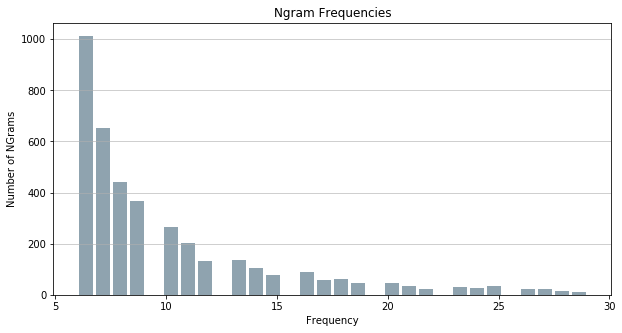

TypeError: cannot perform reduce with flexible type

In [182]:
# histogram of wordcounts #

import numpy as np
import matplotlib.pyplot as plt
import datetime

print (article_ngrams.most_common(50))

y=[]
for phr, c in article_ngrams.most_common():
    if c>5 and c<30:
        y.append(c)
    

    
# y = [1,1,3,3,100,1,1,1,12,2,2,2,2,2,3,4,5,6]
plt.figure(figsize=(10,5))


print ("DONE")
    
n, bins, patches = plt.hist(x=y, bins=30, color='#607c8e',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Frequency')
plt.ylabel('Number of NGrams')
plt.title('Ngram Frequencies')
# plt.text(23, 45, r'$\mu=15, b=3$')
# maxfreq = n.max()
# Set a clean upper y-axis limit.
# plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

plt.show() 

print ("min:", min(t), " max:",max(t), "mean:", int(np.mean(np.array(t))))

In [148]:
# Show graph
import matplotlib.pyplot as plt

 

# limit=60; start=2; step=6;


plt.plot(x, y)

# for i, c in enumerate(coherence_values):
#     print (x[i], c)


plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

KeyboardInterrupt: 

In [195]:
### WITH INFORMATIVE PRIOR

total = sum([c if c>0 else 1 for tup,c in ngrams_dict.items()])
prior = []
for ngram in v:
    tup = ngram.split()
    gram = (tup[0],tup[1],tup[2])
    # temp fix?
    c = ngrams_dict[gram]
    if c == 0:
        c = 1
    freq = c/float(total)
    prior.append(freq)

prior = np.array(prior)
print (len(prior))

10000


In [196]:
import FightinWords as fw
reload(fw)

from wordfreq import word_frequency
from sklearn.feature_extraction.text import CountVectorizer as CV


v = ["{} {} {}".format(phr[0],phr[1], phr[2]) for phr, c in sorted_tot[:10000]]
l_1 = ["{} {} {}".format(phr[0],phr[1], phr[2]) for phr in ll]
l_2 = ["{} {} {}".format(phr[0],phr[1], phr[2]) for phr in rl]


# v = ["{} {}".format(phr[0],phr[1]) for phr, c in sorted_tot[:10000]]
# l_1 = ["{} {}".format(phr[0],phr[1]) for phr in ll]
# l_2 = ["{} {}".format(phr[0],phr[1]) for phr in rl]

# l_1 = [word for art in left_collocations_article for word in art]
# l_2 = [word for art in right_collocations_article for word in art]

print (len(v))

cv = CV(decode_error = 'ignore',
                binary = False, ngram_range=(1,3),
                max_features = 15000, vocabulary=v)

r = fw.bayes_compare_language(l_1, l_2,cv=cv1, prior=prior)

10000
['privat email server', 'state john kerri', 'secretari state john', 'nobel peac prize', 'nation committe email']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Vocab size is 10000
Comparing language...


In [197]:
print (r[:5])

for i in sorted(r,key=lambda x:x[1]):
    phr, score = i[0].split(" "),i[1]
#     print ("{}\t\t{}".format(phr[0],score))
    print ("{}.{}.{}\t\t{}".format(phr[0],phr[1], phr[2],score))

[('make america great', -9.954718065956344), ('nation secur advis', -9.021239504190484), ('white work class', -8.236390687803064), ('environment protect agenc', -7.50428751696414), ('speaker paul ryan', -7.160271582196979)]
make.america.great		-9.954718065956344
nation.secur.advis		-9.021239504190484
white.work.class		-8.236390687803064
environment.protect.agenc		-7.50428751696414
speaker.paul.ryan		-7.160271582196979
health.care.plan		-6.291147414871477
health.human.servic		-5.7514019866049475
health.care.bill		-5.68016447675505
hous.speaker.paul		-5.385728026627277
repeal.afford.care		-5.28429825782405
wall.street.journal		-5.1722987842419315
pew.research.center		-5.172281817011091
secretari.health.human		-5.111536978031489
replac.afford.care		-5.047156889507904
paul.ryan.speaker		-4.978671483200326
ryan.speaker.hous		-4.978670821046818
black.life.matter		-4.969067499860137
recep.tayyip.erdogan		-4.905546106728972
southern.poverti.law		-4.905524809410163
poverti.law.center		-4.905524

texa.said.testimoni		0.008297585546845378
choic.advis.suggest		0.008297585546845378
shame.much.question		0.008297585546845378
push.hard.georg		0.008297585546845378
attack.justic.depart		0.008297585546845378
allow.reduc.corpor		0.008297585546845378
histori.record.judg		0.008297585546845378
lavrov.use.ring		0.008297585546845378
feder.preclear.new		0.008297585546845378
hous.parliament.reach		0.008297585546845378
church.celebr.second		0.008297585546845378
fire.origin.name		0.008297585546845378
polit.metamorphosi.hope		0.008297585546845378
iran.call.iran		0.008297585546845378
goug.borrow.default		0.008297585546845378
student.murray.talk		0.008297585546845378
find.politician.news		0.008297585546845378
lilla.disparag.import		0.008297585546845378
le.relax.friend		0.008297585546845378
compassion.collabor.decent		0.008297585546845378
public.violat.even		0.008297585546845378
foundat.effect.diplomaci		0.008297585546845378
sens.given.fact		0.008297585546845378
favor.complet.fair		0.0082975855468453

staf.exist.program		0.008297585546845378
word.deed.secret		0.008297585546845378
peopl.interest.social		0.008297585546845378
appear.believ.vladimir		0.008297585546845378
curtail.perhap.design		0.008297585546845378
oppos.neil.gorsuch		0.008297585546845378
support.opinion.hope		0.008297585546845378
diploma.le.far		0.008297585546845378
politician.whose.everi		0.008297585546845378
friend.said.push		0.008297585546845378
outperform.expect.special		0.008297585546845378
byrn.rake.mistreat		0.008297585546845378
remain.exhort.foreign		0.008297585546845378
commend.decis.final		0.008297585546845378
nomine.chief.judg		0.008297585546845378
partner.becam.secretari		0.008297585546845378
voter.consid.idea		0.008297585546845378
ancient.histori.elect		0.008297585546845378
came.day.rule		0.008297585546845378
legal.effort.proceed		0.008297585546845378
cooper.deal.struck		0.008297585546845378
agenc.pentagon.instruct		0.008297585546845378
flee.sink.guess		0.008297585546845378
refuge.child.result		0.0082975855

promis.employ.thousand		0.008297585546845378
abl.line.sorceri		0.008297585546845378
signatur.trade.agreement		0.008297585546845378
right.lawyer.leftist		0.008297585546845378
good.case.studi		0.008297585546845378
educ.attend.pentecostalist		0.008297585546845378
age.say.like		0.008297585546845378
revers.process.express		0.008297585546845378
new.england.social		0.008297585546845378
line.vital.import		0.008297585546845378
soup.even.mention		0.008297585546845378
new.email.wednesday		0.008297585546845378
singl.bill.everi		0.008297585546845378
entir.unfett.market		0.008297585546845378
rage.futur.faction		0.008297585546845378
recognit.least.american		0.008297585546845378
victim.blame.take		0.008297585546845378
color.understand.anoth		0.008297585546845378
voter.win.nomin		0.008297585546845378
thu.peculiar.predica		0.008297585546845378
ideal.democraci.clarifi		0.008297585546845378
number.isra.settler		0.008297585546845378
happi.see.secret		0.008297585546845378
longtim.person.friend		0.0082975855

nomin.christian.leav		0.008297585546845378
choic.terrorist.islam		0.008297585546845378
email.matter.involv		0.008297585546845378
strategist.websit.run		0.008297585546845378
dyson.found.think		0.008297585546845378
sexual.equal.also		0.008297585546845378
look.long.time		0.008297585546845378
historian.timothi.garton		0.008297585546845378
revolut.tri.rais		0.008297585546845378
instanc.western.elit		0.008297585546845378
wisconsin.pennsylvania.yet		0.008297585546845378
student.avow.better		0.008297585546845378
progress.still.much		0.008297585546845378
senat.nation.unelect		0.008297585546845378
comment.first.mainstream		0.008297585546845378
violat.lobbi.rule		0.008297585546845378
believ.anybodi.constitut		0.008297585546845378
away.next.time		0.008297585546845378
think.watch.mention		0.008297585546845378
governor.virginia.support		0.008297585546845378
drink.use.call		0.008297585546845378
degre.win.back		0.008297585546845378
well.hispan.immigr		0.008297585546845378
school.inher.unequ		0.0082975

believ.born.unit		0.008767127108030801
left.steve.phillip		0.008767127108030801
move.left.steve		0.008767127108030801
question.sent.comey		0.008767127108030801
compar.woman.year		0.008767127108030801
koberna.doylestown.watch		0.008767127108030801
john.podesta.campaign		0.008767127108030801
fact.spent.last		0.008767127108030801
issu.common.ground		0.008767127108030801
pertin.investig.use		0.008767127108030801
risk.taint.campaign		0.008767127108030801
administr.offici.work		0.008767127108030801
sudan.peopl.armi		0.008767127108030801
email.campaign.chairman		0.008767127108030801
onlin.put.ill		0.008767127108030801
peopl.arm.forc		0.008767127108030801
leak.email.campaign		0.008767127108030801
step.administr.taken		0.008767127108030801
child.care.propos		0.008767127108030801
becom.madam.get		0.008767127108030801
argu.popular.vote		0.008767127108030801
simcha.felder.brooklyn		0.008767127108030801
group.compar.woman		0.008767127108030801
break.nation.committe		0.008767127108030801
bill.year.a

In [198]:
for i in sorted(r,key=lambda x:x[1],reverse=True):
    phr, score = i[0].split(" "),i[1]
    print ("{}.{}.{}\t\t{}".format(phr[0],phr[1], phr[2],score))

time.free.nyt		0.04918437224226312
aung.san.suu		0.03924555990710802
san.suu.kyi		0.03924555990710802
nobel.peac.prize		0.038387314347370236
secur.council.resolut		0.036038643655873316
state.attorney.gener		0.033451367037434385
year.sign.opinion		0.03240463312587112
mental.health.problem		0.032233668063008286
seri.front.page		0.031860602475116365
minist.narendra.modi		0.031361982011554206
prime.minist.narendra		0.031361982011554206
threat.unit.state		0.030719316328682484
sentenc.year.prison		0.030104304023852124
five.star.movement		0.027143240669589192
ten.thousand.peopl		0.02685105934843208
occupi.wall.street		0.02611543737307392
univers.advertis.continu		0.02567860381571675
die.advertis.continu		0.02534644598792234
suprem.court.case		0.02534644598792234
feder.district.judg		0.02453988301614853
educ.advertis.continu		0.02453988301614853
collaps.soviet.union		0.02369061366038982
unit.state.new		0.02369061366038982
intern.human.right		0.02369061366038982
creat.good.job		0.02369061366038

attent.want.reward		0.008297585546845378
small.individu.ye		0.008297585546845378
singl.woman.confront		0.008297585546845378
year.abe.streep		0.008297585546845378
foreign.minist.last		0.008297585546845378
station.benefit.pretend		0.008297585546845378
talk.averag.score		0.008297585546845378
denounc.far.le		0.008297585546845378
marit.strife.domest		0.008297585546845378
beat.idol.michael		0.008297585546845378
watch.men.bridl		0.008297585546845378
tillet.associ.minor		0.008297585546845378
read.threat.global		0.008297585546845378
decid.fewer.vote		0.008297585546845378
show.great.leadership		0.008297585546845378
chrysler.toyota.refus		0.008297585546845378
era.also.display		0.008297585546845378
miner.date.back		0.008297585546845378
need.invest.america		0.008297585546845378
sunday.review.sure		0.008297585546845378
proposit.roosevelt.institut		0.008297585546845378
said.feder.recogn		0.008297585546845378
offici.visit.hiroshima		0.008297585546845378
gener.evangel.white		0.008297585546845378
realli

terror.fact.american		0.008297585546845378
signific.unfinish.busi		0.008297585546845378
time.discu.leak		0.008297585546845378
real.let.polit		0.008297585546845378
certitud.campaign.perhap		0.008297585546845378
presidenti.nomine.okay		0.008297585546845378
jour.impeach.period		0.008297585546845378
committe.show.campaign		0.008297585546845378
month.resettl.syrian		0.008297585546845378
coupl.year.pursu		0.008297585546845378
year.thought.final		0.008297585546845378
retweet.similarli.lopsid		0.008297585546845378
abil.senat.illinoi		0.008297585546845378
washington.keep.tweet		0.008297585546845378
glee.detractor.remark		0.008297585546845378
sens.profession.roil		0.008297585546845378
hate.see.someon		0.008297585546845378
popular.vote.tendenc		0.008297585546845378
secular.directli.contrari		0.008297585546845378
say.ever.endless		0.008297585546845378
sorri.say.candid		0.008297585546845378
unmarri.childless.woman		0.008297585546845378
deal.success.curb		0.008297585546845378
deng.xiaop.new		0.00829

initi.summit.meet		0.008297585546845378
temptat.embrac.ident		0.008297585546845378
acknowledg.realiti.effect		0.008297585546845378
opinion.discuss.bill		0.008297585546845378
trade.found.rhetor		0.008297585546845378
china.read.main		0.008297585546845378
court.destin.target		0.008297585546845378
hatr.take.form		0.008297585546845378
white.paper.polici		0.008297585546845378
game.exercis.anoth		0.008297585546845378
investig.comey.said		0.008297585546845378
receiv.coverag.advertis		0.008297585546845378
basil.other.ship		0.008297585546845378
space.honest.analysi		0.008297585546845378
thing.bill.sign		0.008297585546845378
combin.undertak.includ		0.008297585546845378
white.govern.percent		0.008297585546845378
administr.success.deport		0.008297585546845378
week.harvard.shorenstein		0.008297585546845378
nelson.follow.end		0.008297585546845378
telepromt.even.look		0.008297585546845378
plot.outsid.actor		0.008297585546845378
aleppo.destroy.assad		0.008297585546845378
oversaw.robust.econom		0.008297

predominantli.action.dap		0.008297585546845378
morn.elect.brief		0.008297585546845378
wisconsin.say.labor		0.008297585546845378
massachusett.transmogrifi.immigr		0.008297585546845378
plan.mix.govern		0.008297585546845378
student.roundli.ridicul		0.008297585546845378
qualif.perri.former		0.008297585546845378
els.clinton.ultim		0.008297585546845378
servic.leak.privat		0.008297585546845378
sheila.case.benner		0.008297585546845378
next.georgia.vote		0.008297585546845378
support.believ.fight		0.008297585546845378
bill.said.world		0.008297585546845378
speech.meet.mass		0.008297585546845378
slippag.fuel.effici		0.008297585546845378
iraq.surg.afghanistan		0.008297585546845378
perman.resid.america		0.008297585546845378
convent.violenc.polic		0.008297585546845378
first.know.world		0.008297585546845378
complex.problem.someon		0.008297585546845378
charleston.sound.much		0.008297585546845378
similar.way.use		0.008297585546845378
first.mmusi.maiman		0.008297585546845378
hair.said.sever		0.0082975855

secretari.state.fail		0.008297585546845378
job.convinc.voter		0.008297585546845378
union.rate.steadi		0.008297585546845378
system.still.much		0.008297585546845378
judiciari.committe.say		0.008297585546845378
trumpism.first.place		0.008297585546845378
religi.minor.noth		0.008297585546845378
bomb.savag.appar		0.008297585546845378
furor.includ.fundament		0.008297585546845378
earli.poem.end		0.008297585546845378
audienc.rather.reach		0.008297585546845378
way.spend.twice		0.008297585546845378
also.fairer.advertis		0.008297585546845378
bad.way.boost		0.008297585546845378
birther.lie.complain		0.008297585546845378
hype.press.never		0.008297585546845378
repres.hope.someon		0.008297585546845378
cultur.econom.protectionist		0.008297585546845378
perhap.peopl.decid		0.008297585546845378
hard.get.brief		0.008297585546845378
victori.defect.left		0.008297585546845378
origin.made.revolut		0.008297585546845378
good.heart.real		0.008297585546845378
readi.move.era		0.008297585546845378
part.victori.heart